In [1]:
!pip install bs4
!pip install lxml
!pip install html5lib
!pip install yfinance
!pip install pandas
!pip install requests
!pip install plotly

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Question 1: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [5]:
tesla = yf.Ticker("TSLA")

In [6]:
tesla_data = tesla.history(period="max")

In [7]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data

Display the last five rows of the tesla_revenue dataframe using the tail function. Upload a screenshot of the results.

In [8]:
url =" https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

html_data  = requests.get(url).text

In [9]:
soup = BeautifulSoup(html_data, 'html5lib')

In [10]:
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

In [11]:
for row in soup.find_all("tbody")[1].find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text

    # Finally we append the data of each row to the table
    tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)


In [32]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

In [33]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [34]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


## Question 3: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the gme_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [14]:
GameStop = yf.Ticker("GME")

In [15]:
gme_data = GameStop.history(period="max")

In [16]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data

Display the last five rows of the gme_revenue dataframe using the tail function. Upload a screenshot of the results.

In [46]:
url =" https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

html_data  = requests.get(url).text

In [47]:
soup = BeautifulSoup(html_data, 'html5lib')

In [48]:
gamestop_revenue = pd.DataFrame(columns=["Date", "Revenue"])

In [49]:
for row in soup.find_all("tbody")[1].find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text

    # Finally we append the data of each row to the table
    gamestop_revenue = gamestop_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)

In [50]:
gamestop_revenue["Revenue"] = gamestop_revenue['Revenue'].str.replace(',|\$',"")

In [51]:
gamestop_revenue.dropna(inplace=True)

gamestop_revenue = gamestop_revenue[gamestop_revenue['Revenue'] != ""]

In [53]:
gamestop_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


## Question 5: Plot Tesla Stock Graph

Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.

Upload a screenshot of your results.

In [61]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing=.3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False, height=900, title=stock, xaxis_rangeslider_visible=True)
    fig.show()


In [62]:
tesla_stock = yf.Ticker("TSLA")
tesla_data = tesla_stock.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data = tesla_data[["Date", "Close"]]


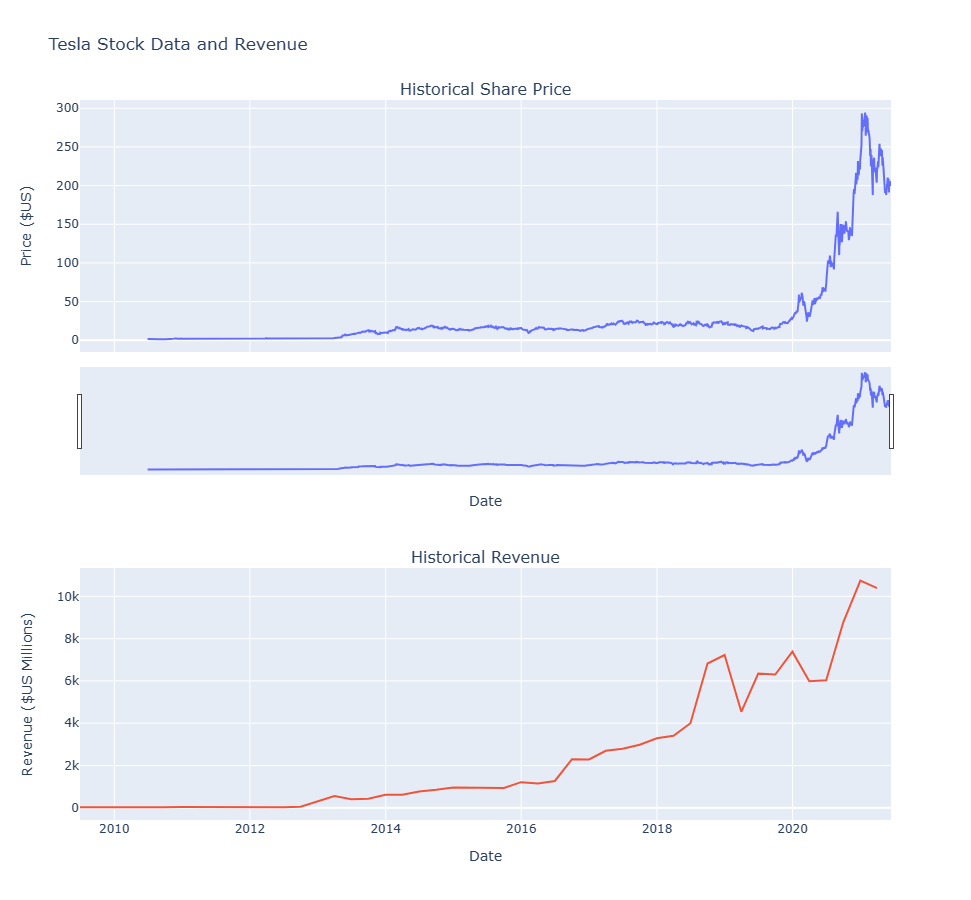

In [63]:
make_graph(tesla_data, tesla_revenue, 'Tesla Stock Data and Revenue')


In [64]:
tesla = yf.Ticker("TSLA")
tesla_share_price_data = tesla.history(period="max")


<AxesSubplot:title={'center':'Tesla Share Price'}, xlabel='Date'>

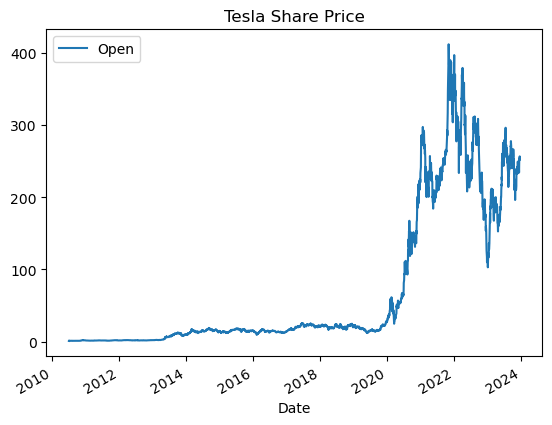

In [66]:
tesla_share_price_data.reset_index(inplace=True)
tesla_share_price_data.plot(x="Date", y="Open", title="Tesla Share Price")


## Question 6: Plot GameStop Stock Graph

Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph

In [67]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
data = requests.get(url).text
soup = BeautifulSoup(data, 'html.parser')
tables = soup.find_all('table')
gamestop_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in tables[1].tbody.find_all("tr"):
    col = row.find_all("td")
    if col != []:
        date = col[0].text
        revenue = col[1].text.replace("$", "").replace(",", "")
        gamestop_revenue = gamestop_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)

# Clean the Revenue Data
gamestop_revenue.loc[:, 'Revenue'] = gamestop_revenue['Revenue'].str.replace('[^\d.]', '', regex=True)
gamestop_revenue = gamestop_revenue[gamestop_revenue['Revenue'] != '']
gamestop_revenue.loc[:, 'Revenue'] = gamestop_revenue['Revenue'].astype(float)

In [68]:
gamestop_stock = yf.Ticker("GME")
gamestop_data = gamestop_stock.history(period="max")
gamestop_data.reset_index(inplace=True)
gamestop_data = gamestop_data[["Date", "Close"]]


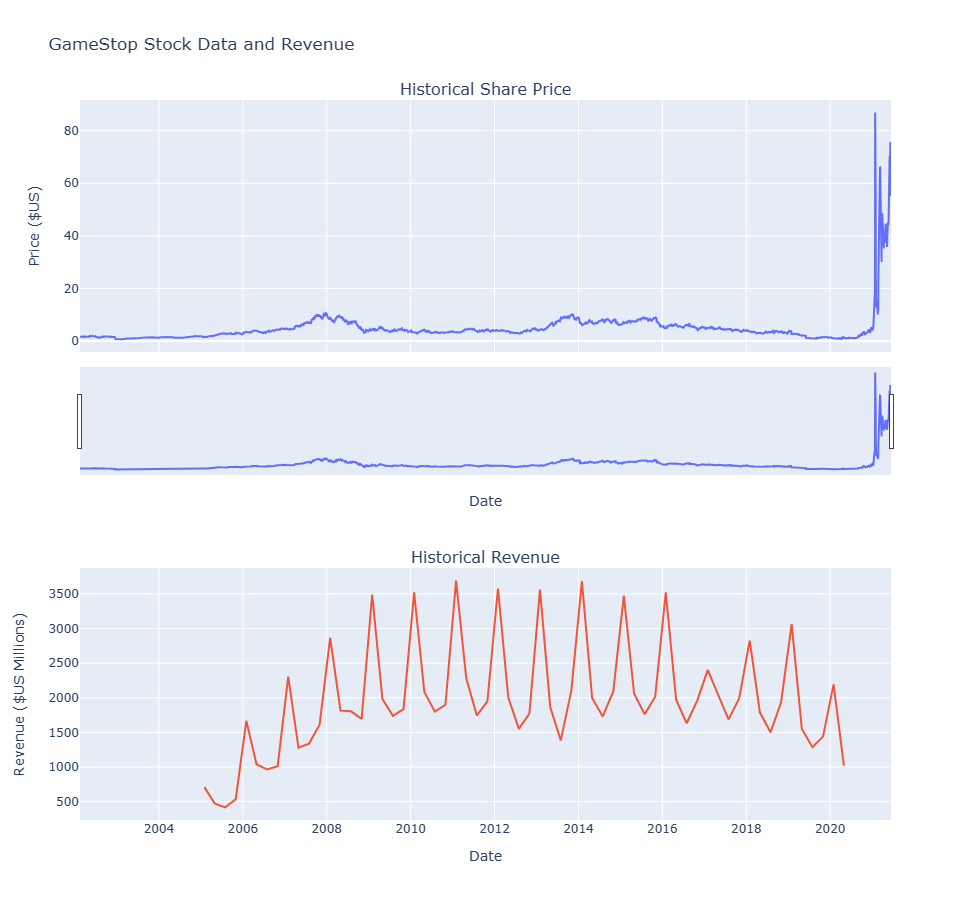

In [69]:
make_graph(gamestop_data, gamestop_revenue, 'GameStop Stock Data and Revenue')

In [70]:
gamestop = yf.Ticker("GME")
gme_share_price_data = gamestop.history(period="max")

<AxesSubplot:title={'center':'GameStop Share Price'}, xlabel='Date'>

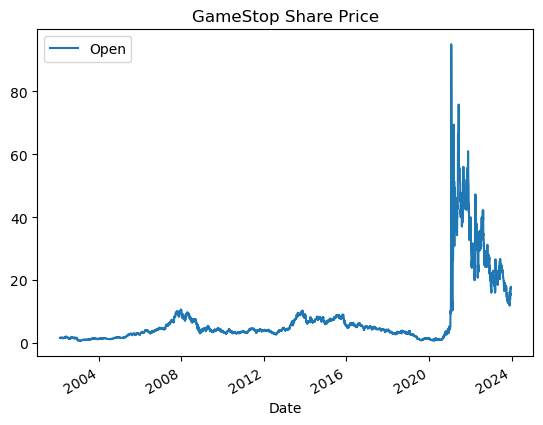

In [71]:
gme_share_price_data.reset_index(inplace=True)
gme_share_price_data.plot(x="Date", y="Open", title="GameStop Share Price")
